# Amazon sales report

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step1: Exploratory Data Analysis (EDA)

### Data inspection

In [2]:
df = pd.read_csv('Amazon Sale Report.csv', index_col='index')

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_6768\263164143.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon Sale Report.csv', index_col='index')


In [3]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
index,,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Date                128975 non-null  object 
 2   Status              128975 non-null  object 
 3   Fulfilment          128975 non-null  object 
 4   Sales Channel       128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Style               128975 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      122103 non-null  object 
 12  Qty                 128975 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           128942 non-null  ob

In [5]:
df['Unnamed: 22'].unique()

array([nan, False], dtype=object)

Inspection resutls are as follows:

- DataType Issues
    - `date` column should be converted from string to datetime
    - `ship-postal-code` column should be converted from float to string
- Drop `unnamed: 22` column
- Columns names
    - replace the `-` with `_` in the column names
    - convert all the column names to lower case
    - remove extra white spaces from the column names such as 'Sales Channel '

### Summary Statistics

-  Generate summary statistics for numerical and categorical variables.

#### Numerical Variables

Qty          Axes(0.125,0.11;0.352273x0.77)
Amount    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

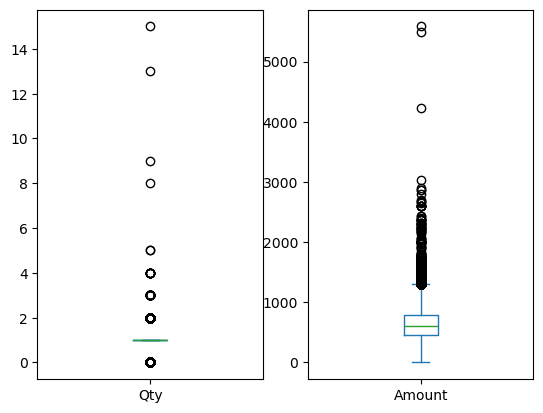

In [6]:
df[['Qty','Amount']].plot(kind='box', subplots=True, layout=(1,2), sharex=False, sharey=False)

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

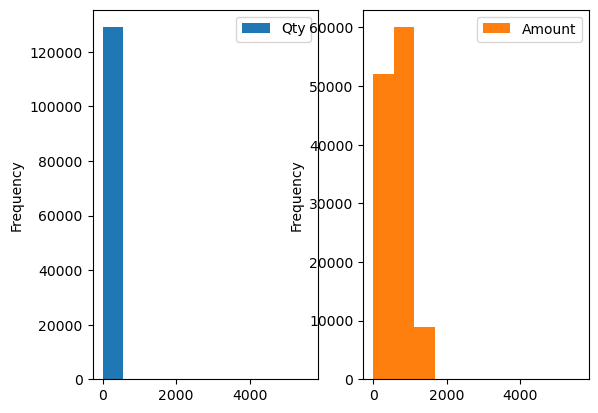

In [7]:
df[['Qty','Amount']].plot(kind='hist', subplots=True, layout=(1,2), sharex=False, sharey=False)

In [8]:
df[['Qty','Amount']].describe()

,Qty,Amount
count,128975.000000,121180.000000
mean,0.904431,648.561465
std,0.313354,281.211687
min,0.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,605.000000
75%,1.000000,788.000000
max,15.000000,5584.000000


In [9]:
df[['Amount','currency']].isnull().sum()

Amount      7795
currency    7795
dtype: int64

results:
- we see that `Qty` is less diverse with the same Q1, Q2, Q3. and a standard deviation of 0.31
- on the other hand, `Amount` has a higher and more diverse distribution 
- both columns have outliers, but `Amount` has more outliers than `Qty`
- since Amount is null when currency is null, then the amount must be the price paid for the product

#### Categorical Variables

In [10]:
# get all column names with object data type
df.select_dtypes(include='object').columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'currency', 'ship-city', 'ship-state', 'ship-country',
       'promotion-ids', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [11]:
# get the columns with object data type
categorical_cols = ['Status','Fulfilment','Sales Channel ','ship-service-level','Category','Size','Courier Status','currency', 'ship-country', 'ship-state', 'fulfilled-by']

- the following categorical columns were discarded because they have too many values (will be addressed later in the analysis)
    - Order ID
    - Date
    - Style
    - SKU
    - ASIN
    - ship-city
    - promotion-ids

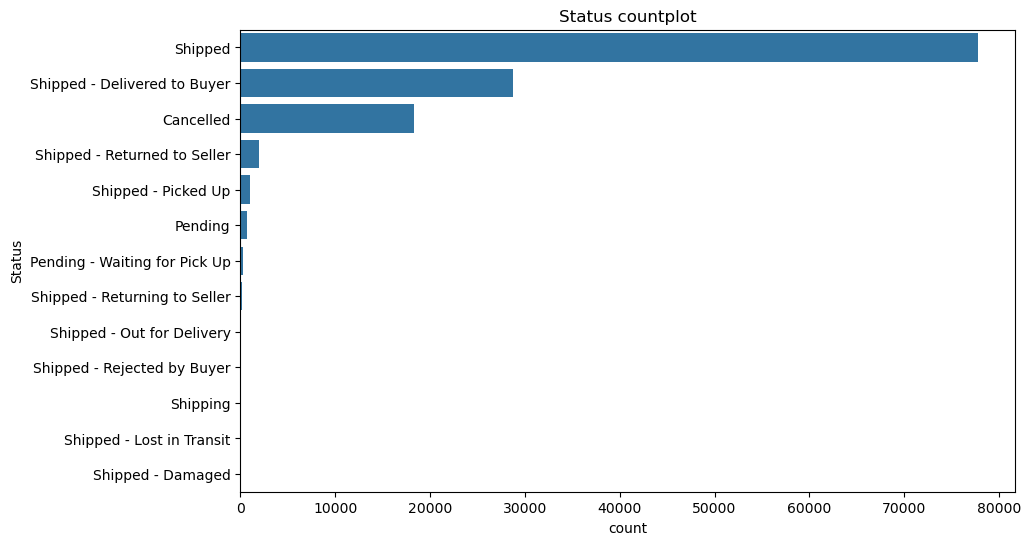

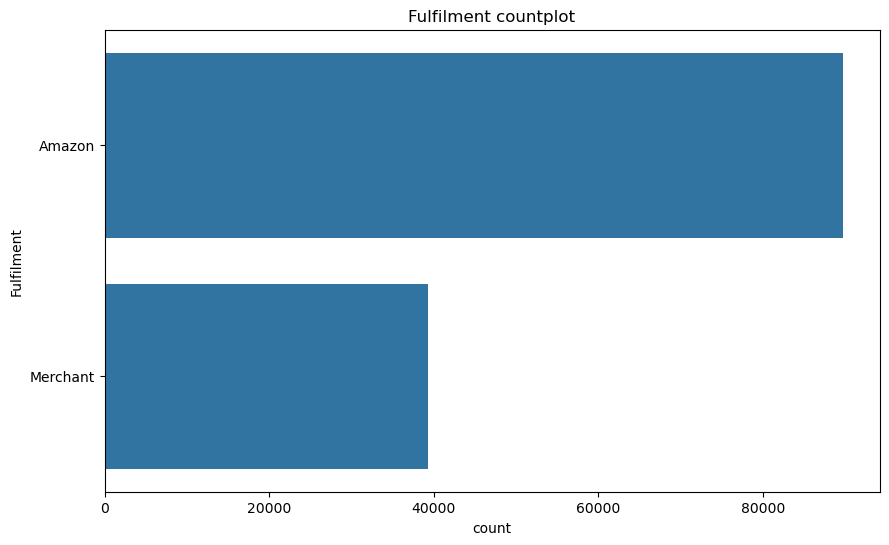

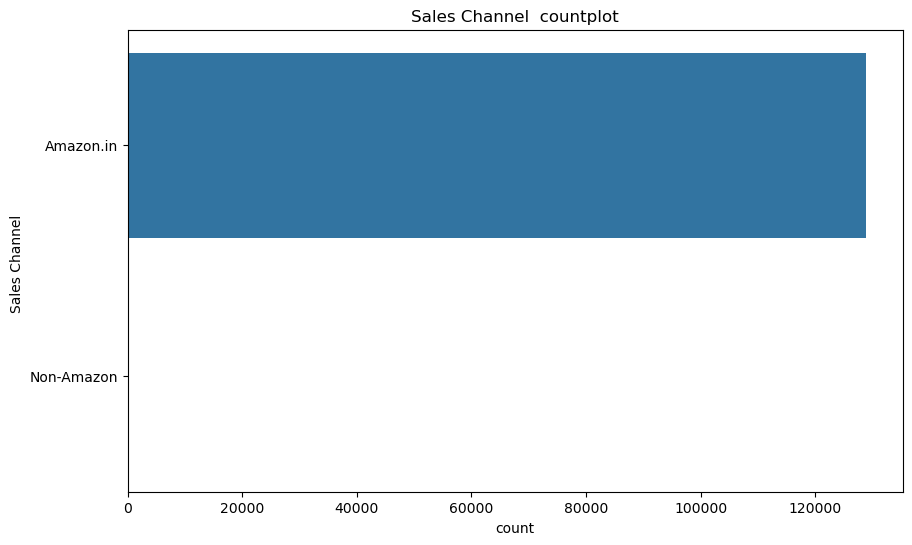

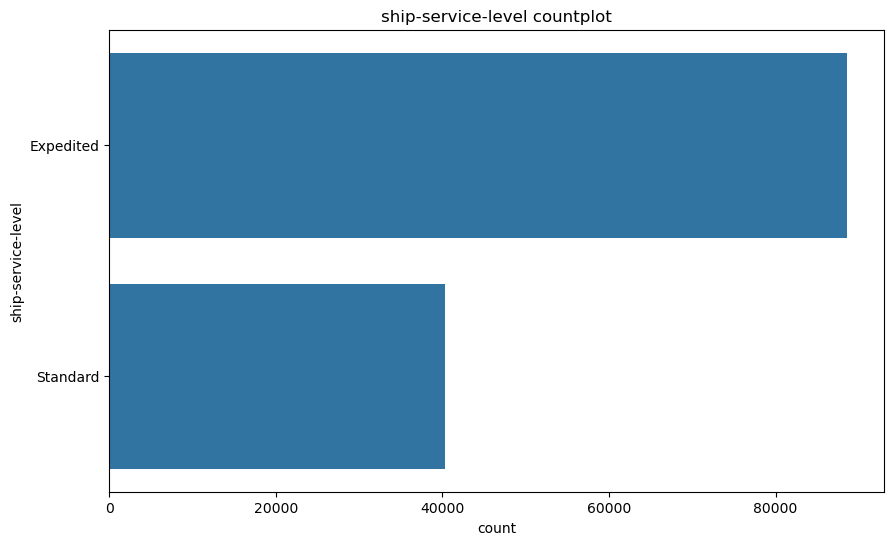

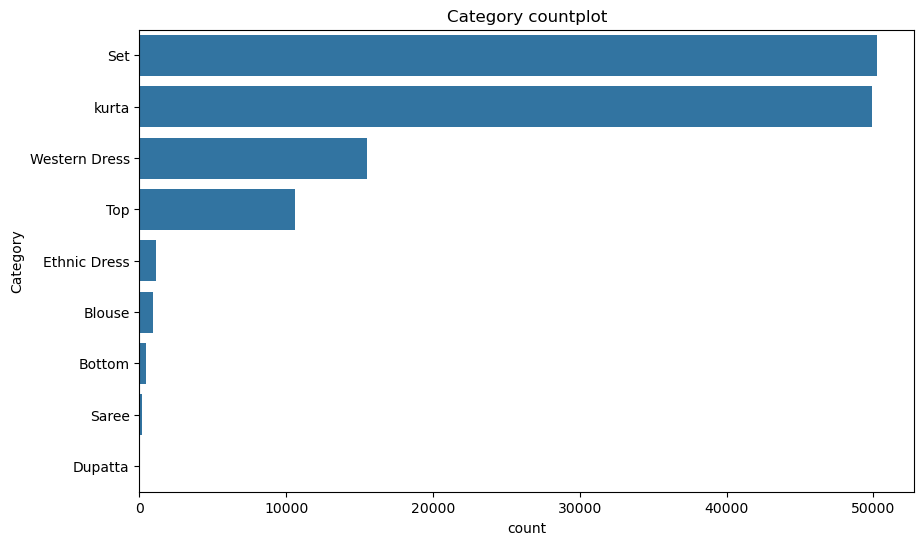

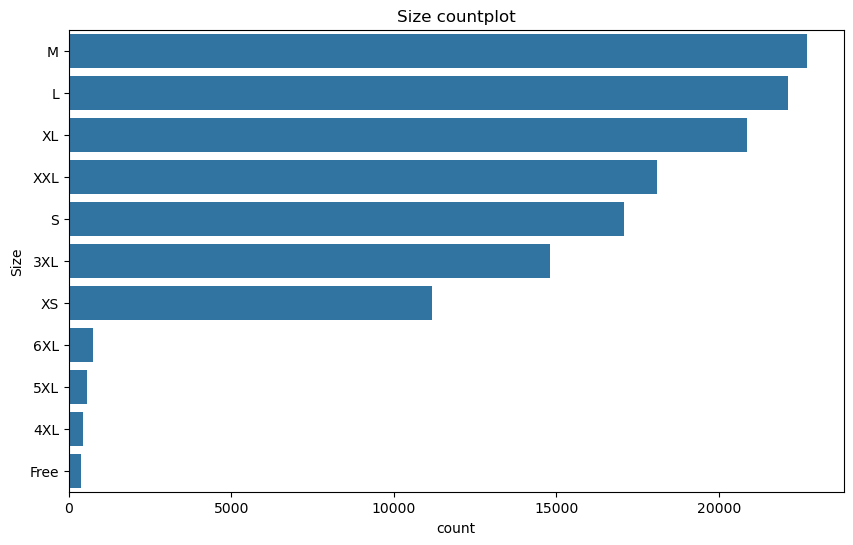

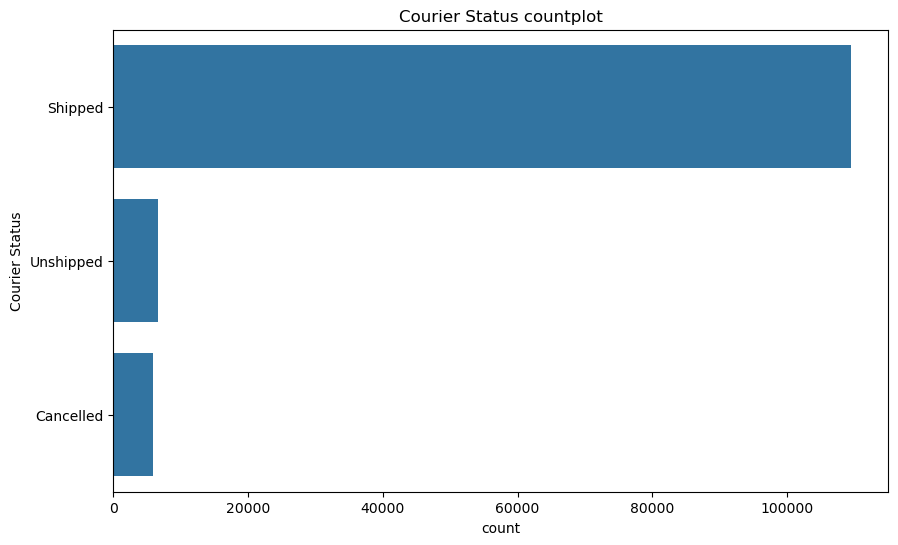

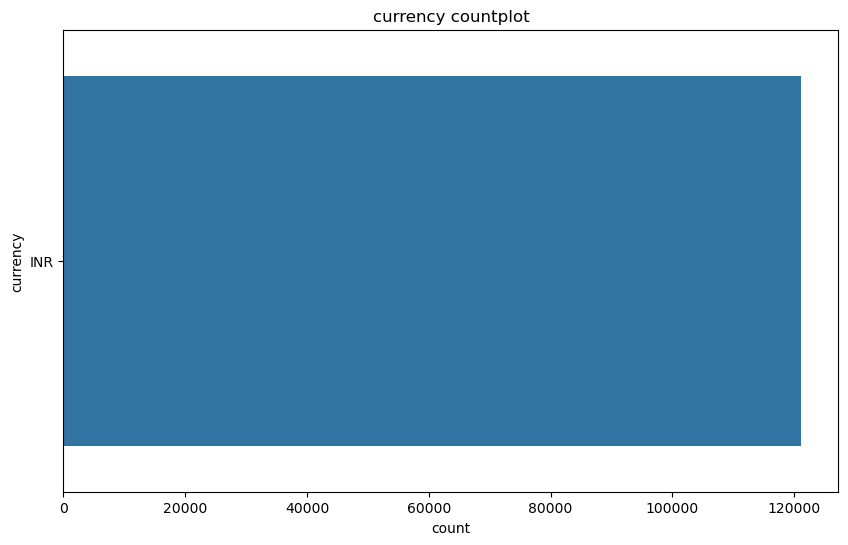

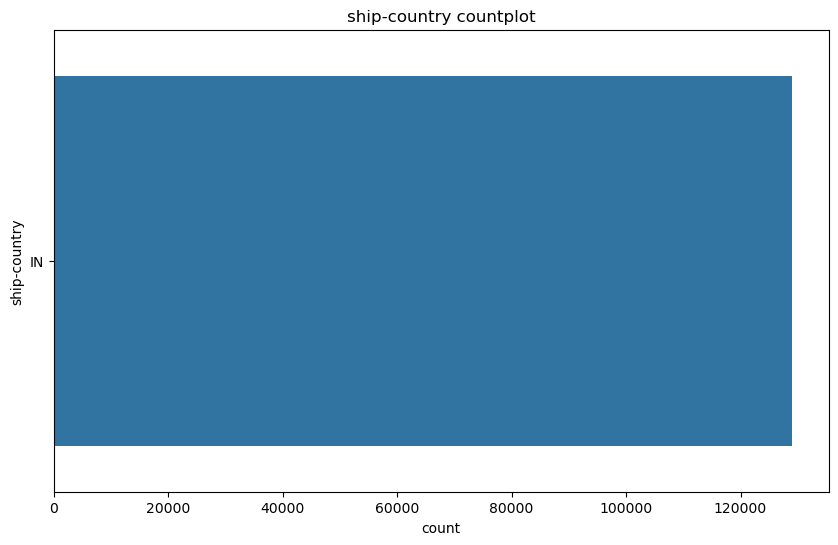

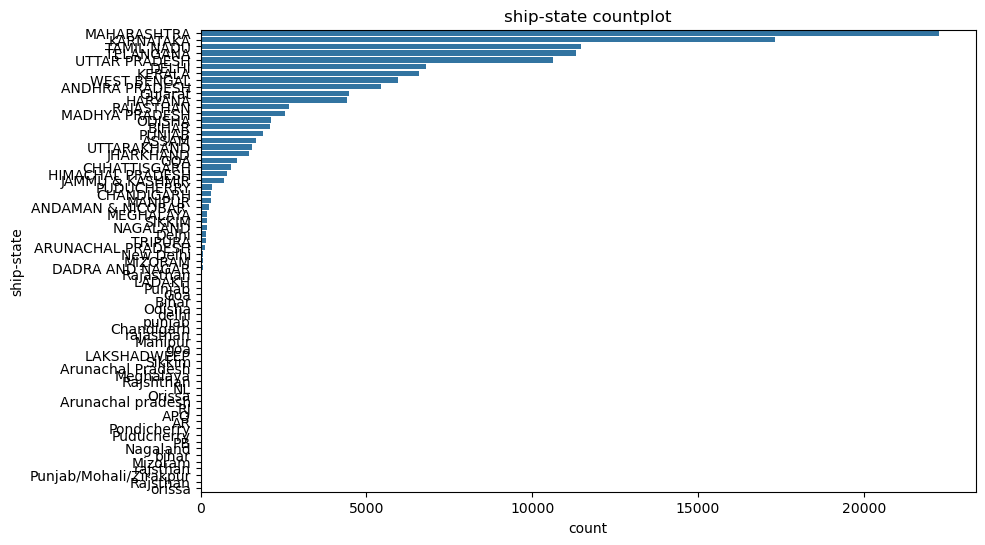

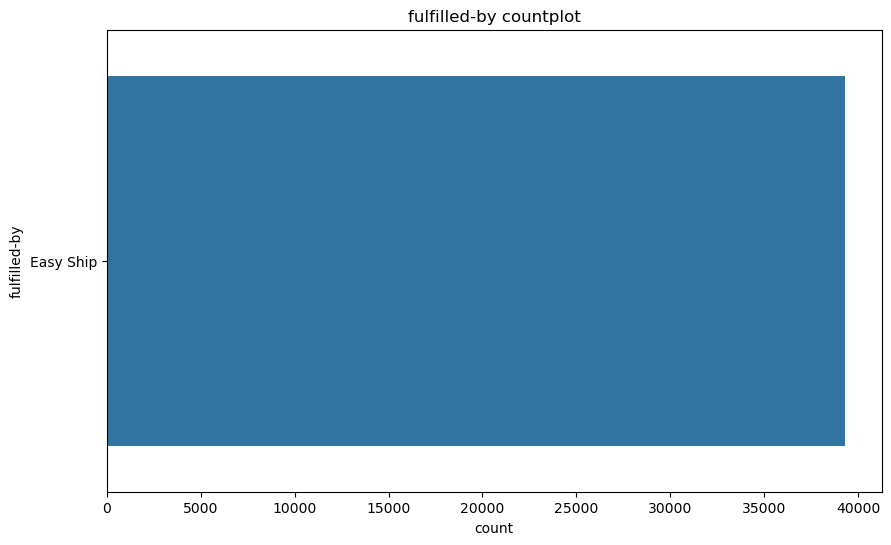

In [12]:
for col in categorical_cols:
    plt.figure(figsize=(10,6))
    sns.countplot(df[col], order = df[col].value_counts().index)
    plt.title(f'{col} countplot')
    plt.show()

Trends and patterns:
- Easy ship is only fulfilment method (because `fulfilled-by` has only 1 value which is 'Easy ship')
- all items in the dataset were shipped to india (`ship-country` is 'IN' and therefore ship `currency` only has the value 'INR' which is Indian Rupee)
    - these columns can be dropped as well
- Almost all Sales are done through 'Amazon.in' website (because `Sales channel` is almost entirely 'Amazon.in' than other sites) and the `Fulfillment` is mostly done by amazon as well than independent merchants
- Most Item status are 'Shipped' and 'Shipped - Delivered to buyer' then 'Canceled' in order 
    - we need to clean this column and make it more consistent, as we already have the `Courier Status` column
- Most people choose **'expedited service'** than the **standard** service
- The most common Sold Categoies are **Set** (Jewelery) then **Kurta** (which is a traditional indian clothes) then **Western Dress**
- Top 5 states are **Maharashtra**, **Karnataka**, **Tamal Nadu**, **Teleangana**, and **UTTAR PRADESH** in terms of sales
- the most common Sizes are Medium, Large, and XL in order

## Step2: Data Preprocessing

In [13]:
# drop the Unnamed: 22 column
df.drop(columns='Unnamed: 22', inplace=True)

### Handling Missing Values

In [14]:
# missing values 
df.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
dtype: int64

#### Courier Status
- we will get the values from the status column and fill the missing values in the `Courier Status` column

In [15]:
df['Courier Status'].value_counts()

Courier Status
Shipped      109487
Unshipped      6681
Cancelled      5935
Name: count, dtype: int64

In [16]:
# get the rows where Couries Status is null and check the status
df[df['Courier Status'].isnull()]['Status'].value_counts()

Status
Cancelled                       6861
Shipped - Delivered to Buyer       8
Shipped - Returned to Seller       3
Name: count, dtype: int64

we see that most of the missing values in the `Courier Status` column are **Canceled** orders, so we will fill the missing values with the corresponding status

In [17]:
# get the rows with missing values in the 'Courier Status' column and Cancelled status and fill with 'Cancelled'
df.loc[(df['Courier Status'].isnull()) & (df['Status'] == 'Cancelled'), 'Courier Status'] = 'Cancelled'

In [18]:
# for the rest of the missing values in the 'Courier Status' column, fill with 'Shipped'
df['Courier Status'].fillna('Shipped', inplace=True)

#### Currency and Amount

In [19]:
df[df['currency'].isnull() & df['Amount'].isnull()].shape

(7795, 22)

In [20]:
# drop the rows with missing values in 'currency' and 'Amount' columns
df.dropna(subset=['currency', 'Amount'], inplace=True)

#### City, State, Postal Code, and Country

In [21]:
df[df['ship-country'].isnull() & df['ship-state'].isnull() & df['ship-city'].isnull() & df['ship-postal-code'].isnull()].shape

(31, 22)

we see that all of them are missing together,so we can't use some of them to fill the others, and since the number of missing values is small, we can drop them

In [22]:
df.dropna(subset=['ship-country', 'ship-state', 'ship-city', 'ship-postal-code'], inplace=True)

#### Fulfilled-by

In [23]:
df['fulfilled-by'].value_counts()

fulfilled-by
Easy Ship    37528
Name: count, dtype: int64

since 'Easy ship' is the only method that is indicated in the dataset, the rows with missing values will be assumed to be 'Not Easy Ship'

In [24]:
df['fulfilled-by'].fillna('Not Easy Ship', inplace=True)

#### Promotion IDs

`Bonus`: Since the `Promotion IDs` is a multi-valued column, we will create a new table in which we will associate the order ID with every single promotion ID (better structure and makes it easier for analysis)

In [25]:
rows_with_promotion_Ids = df[df['promotion-ids'].notnull()]
rows_with_promotion_Ids.shape

(79458, 22)

In [26]:
# Create an empty list to store the data
data = []

# Loop through the rows with promotion-ids and get the values
for index, row in rows_with_promotion_Ids.iterrows():
    order_id = row['Order ID']
    promotion_ids = row['promotion-ids'].split(',')
    for promotion_id in promotion_ids:
        # Append a tuple or dict to the list
        data.append({'order_id': order_id, 'promotion_id': promotion_id})

# Convert the list of dicts to a DataFrame
promotion_df = pd.DataFrame(data)

- we will create a new column that indicates if the item was on promotion or not

In [27]:
# create a new column 'has_promotion' and fill with True if 'Promotion_ids' is not null else False
df['has_promotion'] = df['promotion-ids'].notnull()

- now that promotion IDs are in a separate table, we can drop the `Promotion IDs` column

In [28]:
# drop the 'promotion-ids' column
df.drop(columns='promotion-ids', inplace=True)

In [29]:
df.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
has_promotion         0
dtype: int64

### DataType Conversion

- DataType Issues
    - `date` column should be converted from string to datetime
    - `ship-postal-code` column should be converted from float to string

In [30]:
# convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')

In [31]:
# convert ship-postal-code to string
df['ship-postal-code'] = df['ship-postal-code'].astype(int).astype(str)

### Outlier Detection

In [32]:
df.shape

(121149, 22)

In [33]:
df[['Qty','Amount']].describe()

,Qty,Amount
count,121149.000000,121149.000000
mean,0.961246,648.573305
std,0.214327,281.222115
min,0.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,605.000000
75%,1.000000,788.000000
max,8.000000,5584.000000


In [34]:
# Drop the outliers in the 'Amount' column
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound, upper_bound

(-59.5, 1296.5)

In [35]:
# Drop the outliers in the 'Qty' column
Q1 = df['Qty'].quantile(0.25)
Q3 = df['Qty'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound, upper_bound

(1.0, 1.0)

- according to statistical analysis, we should remove the outliers outside the bounds above
- but in the context of sales
    - The values of Amount are reasonable, so we will keep them
    - we will remove all values with Qty < 1 (since it is not reasonable to have a quantity of 0)

In [36]:
# remove all the rows 'Qty' less than 1
df = df[df['Qty'] >= 1]

In [37]:
df['Qty'].value_counts()

Qty
1    115637
2       337
3        31
4         8
5         2
8         1
Name: count, dtype: int64

In [38]:
df['Amount'].value_counts()

Amount
399.0     5441
771.0     2797
735.0     2435
0.0       2343
487.0     2292
          ... 
1722.0       1
1316.0       1
2655.0       1
615.0        1
639.0        1
Name: count, Length: 867, dtype: int64

### Renaming Columns

In [39]:
# rename the columns by removing tailing spaces, replacing spaces with underscores and converting to lower case
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('-', '_').str.lower()

## Saving the cleaned data

In [40]:
df.to_csv('Amazon_sales_cleaned.csv', index=False)
promotion_df.to_csv('Amazon_order_promotion_pairs.csv', index=False)

## Step4: Predictive modeling

In [1]:
import pandas as pd
df = pd.read_csv('Amazon_sales_cleaned.csv')

### Feature Selection

In [2]:
# we will take a copy from the data to preprocess it for training
data = df.copy()

In [3]:
data.nunique()

order_id              108271
date                      91
status                    12
fulfilment                 2
sales_channel              1
ship_service_level         2
style                   1371
sku                     7132
category                   9
size                      11
asin                    7128
courier_status             2
qty                        6
currency                   1
amount                   867
ship_city               8499
ship_state                67
ship_postal_code        9142
ship_country               1
b2b                        2
fulfilled_by               2
has_promotion              2
dtype: int64

- we will drop the categorical columns with 1 or too many values because they aren't predictive features
    - order_id
    - date
    - sales_channel
    - style
    - sku
    - asin
    - currency
    - ship_city
    - ship_postal_code
    - ship_country


In [4]:
data.drop(columns=['order_id', 'date', 'sales_channel', 'style', 'sku', 'asin', 'currency', 'ship_city', 'ship_postal_code', 'ship_country'], inplace=True)

In [5]:
data.nunique()

status                 12
fulfilment              2
ship_service_level      2
category                9
size                   11
courier_status          2
qty                     6
amount                867
ship_state             67
b2b                     2
fulfilled_by            2
has_promotion           2
dtype: int64

### Label Preprocessing

In [6]:
data[data['courier_status'] == 'Shipped']['status'].value_counts()

status
Shipped                          77580
Shipped - Delivered to Buyer     28754
Shipped - Returned to Seller      1947
Shipped - Picked Up                973
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Pending                             10
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

In [7]:
data[data['courier_status'] == 'Unshipped']['status'].value_counts()

status
Cancelled                        5628
Pending                           646
Pending - Waiting for Pick Up     281
Name: count, dtype: int64

In [8]:
# get the rows where courier_status is 'Unshipped' and status is 'Pending' or 'Pending - Waiting for Pick Up' and chenge the status to 'Unshipped - Pending'
data.loc[(data['courier_status'] == 'Unshipped') & (data['status'].isin(['Pending', 'Pending - Waiting for Pick Up'])), 'status'] = 'Unshipped - Pending'

In [9]:
# get the rows where the status is either 'Shipped' or 'Shipped - Picked Up' or 'Shipped - Out for Delivery' or 'Pending' and change the status to 'Shipped - Yet to Deliver'
data.loc[data['status'].isin(['Shipped', 'Shipped - Picked Up', 'Shipped - Out for Delivery', 'Pending']), 'status'] = 'Shipped - Yet to Deliver'

In [10]:
# get the rows where the status is either 'Shipped - Returned to Seller', 'Shipped - Returning to Seller' , Shipped - Rejected by Buyer' , 'Shipped - Lost in Transit' or Shipped - Damaged' and change the status to 'Shipped - Failed'
data.loc[data['status'].isin(['Shipped - Returned to Seller', 'Shipped - Returning to Seller', 'Shipped - Rejected by Buyer', 'Shipped - Lost in Transit', 'Shipped - Damaged']), 'status'] = 'Shipped - Failed'

In [11]:
data['status'].value_counts()

status
Shipped - Yet to Deliver        78598
Shipped - Delivered to Buyer    28754
Cancelled                        5628
Shipped - Failed                 2109
Unshipped - Pending               927
Name: count, dtype: int64

- now we only have 5 categories in the labels columns

In [12]:
data.nunique()

status                  5
fulfilment              2
ship_service_level      2
category                9
size                   11
courier_status          2
qty                     6
amount                867
ship_state             67
b2b                     2
fulfilled_by            2
has_promotion           2
dtype: int64

## Data Preprocessing

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

In [14]:
# Encode categorical variables
categorical_features = ['fulfilment', 'ship_service_level', 'category', 'size', 'courier_status', 'ship_state', 'b2b', 'fulfilled_by', 'has_promotion']

for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Separate features and target
X = data.drop('status', axis=1)
y = data['status']

# Encode target variable
target_le = LabelEncoder()
y = target_le.fit_transform(y)

### Split the data

In [34]:
# First split: train and temporary sets (80% train, 20% temporary)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Grid Search

In [43]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(eval_metric='mlogloss'),
                           param_grid=param_grid, verbose=1, cv = 5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'learning_rate': 0.2, 'max_depth': 4, 'subsample': 0.7}
Best accuracy found:  0.9717816739220944


In [44]:
# get the best model
best_model = grid_search.best_estimator_

# Predict the target for the test set
y_pred = best_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=target_le.classes_))

                              precision    recall  f1-score   support

                   Cancelled       0.97      0.99      0.98      1126
Shipped - Delivered to Buyer       0.90      1.00      0.95      5751
            Shipped - Failed       0.00      0.00      0.00       422
    Shipped - Yet to Deliver       1.00      0.99      0.99     15720
         Unshipped - Pending       0.96      0.84      0.90       185

                    accuracy                           0.97     23204
                   macro avg       0.77      0.76      0.76     23204
                weighted avg       0.96      0.97      0.96     23204



c:\Users\TOSHIBA\anaconda3\envs\dl_torch\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TOSHIBA\anaconda3\envs\dl_torch\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TOSHIBA\anaconda3\envs\dl_torch\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

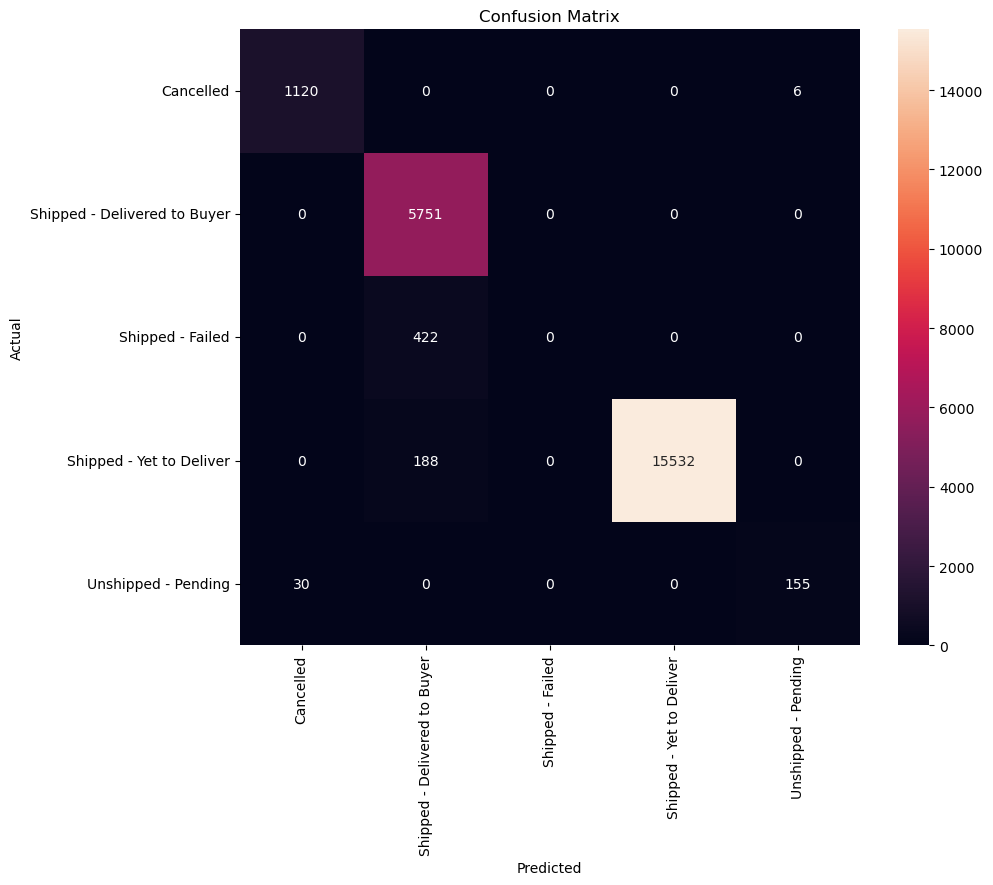

In [45]:
# print the confusion matrix with seaborn 
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_le.classes_, yticklabels=target_le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- we see that Due to the imbalance in the data, the model didn't predict the 'Shipped - Failed' at all
- we will try to overcome that by penalizing the model for misclassifying the minority class

### Compute Class weights

In [46]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Convert class weights to a list matching the target labels
weights = [class_weight_dict[label] for label in y_train]

In [47]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(eval_metric='mlogloss'),
                           param_grid=param_grid, verbose=1, cv = 5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train, sample_weight=weights)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}
Best accuracy found:  0.9147525693494334


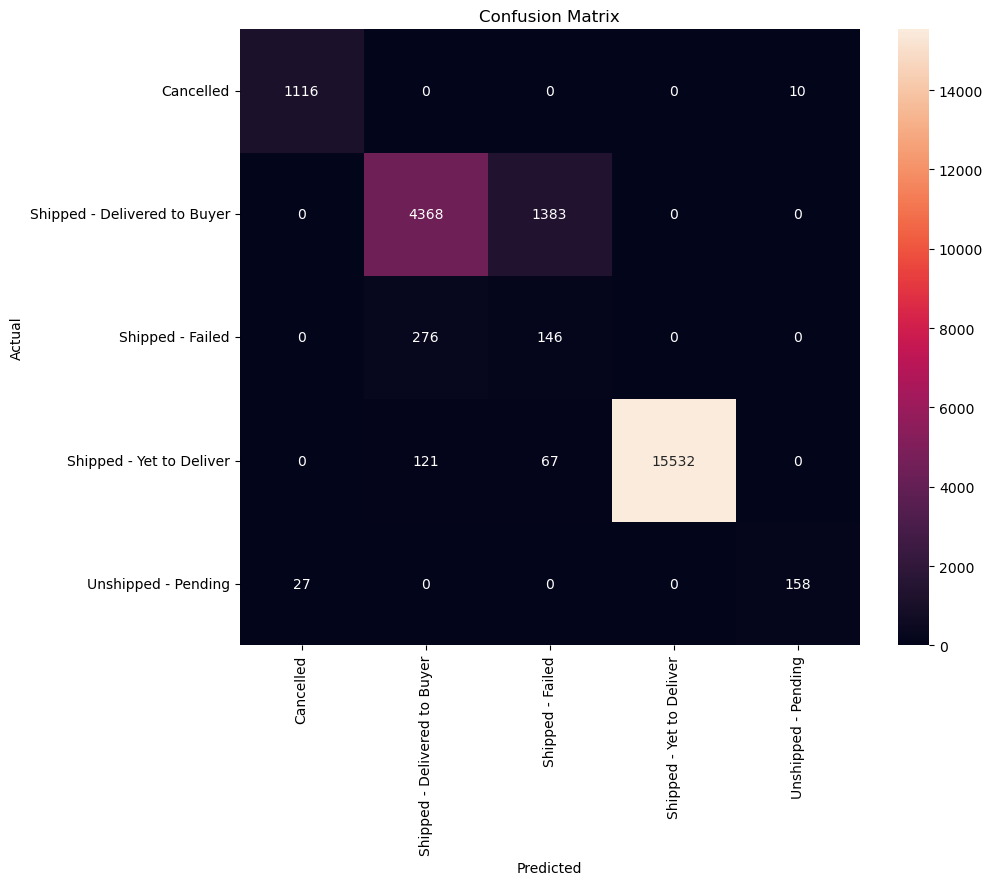

In [49]:
# get the best model
best_model = grid_search.best_estimator_

# Predict the target for the test set
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_le.classes_, yticklabels=target_le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()